# Deep Learning Project
## Classification

In [28]:
# import libraries
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg # For displaying images
%matplotlib inline
from keras import models
# from keras import layers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from tensorflow.keras.utils import plot_model

import os
import tensorflow as tf

In [20]:
#tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-05-21 15:17:21.123187: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /device:GPU:0 with 9648 MB memory:  -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:88:00.0, compute capability: 7.5


True

In [3]:
# import zipfile

# path_to_zip_file = "/nfs/home/twd1956/DeepLearning/Project/archive.zip"
# directory_to_extract_to = "/nfs/home/twd1956/DeepLearning/Project/"

# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [4]:
PATH = "/nfs/home/twd1956/DeepLearning/Project/"

train_dir = os.path.join(PATH, 'Training')
validation_dir = os.path.join(PATH, 'Validation')

BATCH_SIZE = 48
IMG_SIZE = (250, 250)

In [5]:
train_datagen = ImageDataGenerator( # Data Augumentation for test data
                rescale=1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3
                )

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_gen=train_datagen.flow_from_directory(train_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=BATCH_SIZE,
                                            class_mode='binary')

Found 47009 images belonging to 2 classes.


In [7]:
valid_gen=test_datagen.flow_from_directory(validation_dir,
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary')

Found 11649 images belonging to 2 classes.


In [8]:
kernel_s = (3,3)

In [9]:
model=models.Sequential()
model.add(Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# model.summary()

2022-05-21 14:29:38.931559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-21 14:29:39.646397: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-05-21 14:29:39.646450: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9648 MB memory:  -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:88:00.0, compute capability: 7.5


In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [12]:
history=model.fit(train_gen,
                  steps_per_epoch=70,
                  epochs=30,
                  validation_data=valid_gen,
                  validation_steps=50, 
                  verbose=1)

Epoch 1/30


2022-05-21 14:29:52.378133: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


70/70 [==============================] - 70s 953ms/step - loss: 0.7320 - acc: 0.5275 - val_loss: 0.6947 - val_acc: 0.5142
Epoch 2/30
70/70 [==============================] - 69s 981ms/step - loss: 0.6984 - acc: 0.6051 - val_loss: 0.6992 - val_acc: 0.5437
Epoch 3/30
70/70 [==============================] - 68s 978ms/step - loss: 0.6052 - acc: 0.6927 - val_loss: 0.7037 - val_acc: 0.5883
Epoch 4/30
70/70 [==============================] - 72s 1s/step - loss: 0.5579 - acc: 0.7351 - val_loss: 0.5276 - val_acc: 0.7554
Epoch 5/30
70/70 [==============================] - 70s 1s/step - loss: 0.5128 - acc: 0.7711 - val_loss: 0.4222 - val_acc: 0.8133
Epoch 6/30
70/70 [==============================] - 69s 990ms/step - loss: 0.4923 - acc: 0.7747 - val_loss: 0.4519 - val_acc: 0.7979
Epoch 7/30
70/70 [==============================] - 69s 990ms/step - loss: 0.4807 - acc: 0.7911 - val_loss: 0.4287 - val_acc: 0.8192
Epoch 8/30
70/70 [==============================] - 69s 986ms/step - loss: 0.4566 - ac

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [15]:
# #save model to disk
# model_json = model.to_json()
# with open('model_custom.json', 'w') as json_file:
#     json_file.write(model_json)
# model.save_weights('model_custom') 

In [17]:

#testing
scores = model.evaluate(valid_gen, batch_size=BATCH_SIZE, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

243/243 [==============================] - 33s 137ms/step - loss: 0.1665 - acc: 0.9378

Test result: 93.785 loss: 0.167


Text(0.5, 1.0, 'Loss Curves')

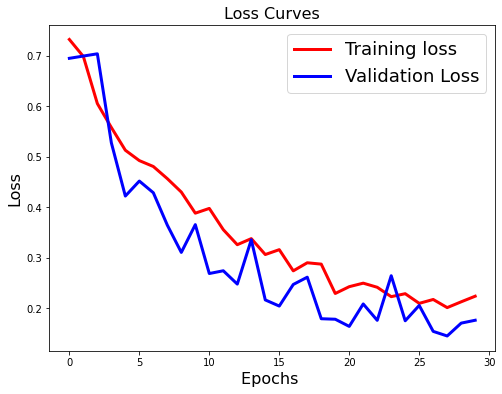

In [18]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)